In [1]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [4]:
_5w_1s_training_acc, _5w_1s_training_loss, _5w_1s_val_acc, _5w_1s_val_loss = read_file('omniglot_5way_1shot/')
_5w_5s_training_acc, _5w_5s_training_loss, _5w_5s_val_acc, _5w_5s_val_loss = read_file('omniglot_5way_5shot/')
_20w_1s_training_acc, _20w_1s_training_loss, _20w_1s_val_acc, _20w_1s_val_loss = read_file('omniglot_20way_1shot/')
_20w_5s_training_acc, _20w_5s_training_loss, _20w_5s_val_acc, _20w_5s_val_loss = read_file('omniglot_20way_5shot/')
_60w_1s_training_acc, _60w_1s_training_loss, _60w_1s_val_acc, _60w_1s_val_loss = read_file('omniglot_60way_1shot/')
_60w_5s_training_acc, _60w_5s_training_loss, _60w_5s_val_acc, _60w_5s_val_loss = read_file('omniglot_60way_5shot/')

In [9]:
_15w_5s_training_acc, _15w_5s_training_loss, _15w_5s_val_acc, _15w_5s_val_loss = read_file('15/')
_20w_5s_training_acc, _20w_5s_training_loss, _20w_5s_val_acc, _20w_5s_val_loss = read_file('20/')

In [4]:
_5w_1s_training_acc, _5w_1s_training_loss, _5w_1s_val_acc, _5w_1s_val_loss = read_file('mini_5way_1shot/')
_5w_5s_training_acc, _5w_5s_training_loss, _5w_5s_val_acc, _5w_5s_val_loss = read_file('mini_5way_5shot/')
_10w_1s_training_acc, _10w_1s_training_loss, _10w_1s_val_acc, _10w_1s_val_loss = read_file('mini_10way_1shot/')
_10w_5s_training_acc, _10w_5s_training_loss, _10w_5s_val_acc, _10w_5s_val_loss = read_file('mini_10way_5shot/')
_15w_1s_training_acc, _15w_1s_training_loss, _15w_1s_val_acc, _15w_1s_val_loss = read_file('mini_15way_1shot/')
_15w_5s_training_acc, _15w_5s_training_loss, _15w_5s_val_acc, _15w_5s_val_loss = read_file('mini_15way_5shot/')
_20w_1s_training_acc, _20w_1s_training_loss, _20w_1s_val_acc, _20w_1s_val_loss = read_file('mini_20way_1shot/')
_20w_5s_training_acc, _20w_5s_training_loss, _20w_5s_val_acc, _20w_5s_val_loss = read_file('mini_20way_5shot/')

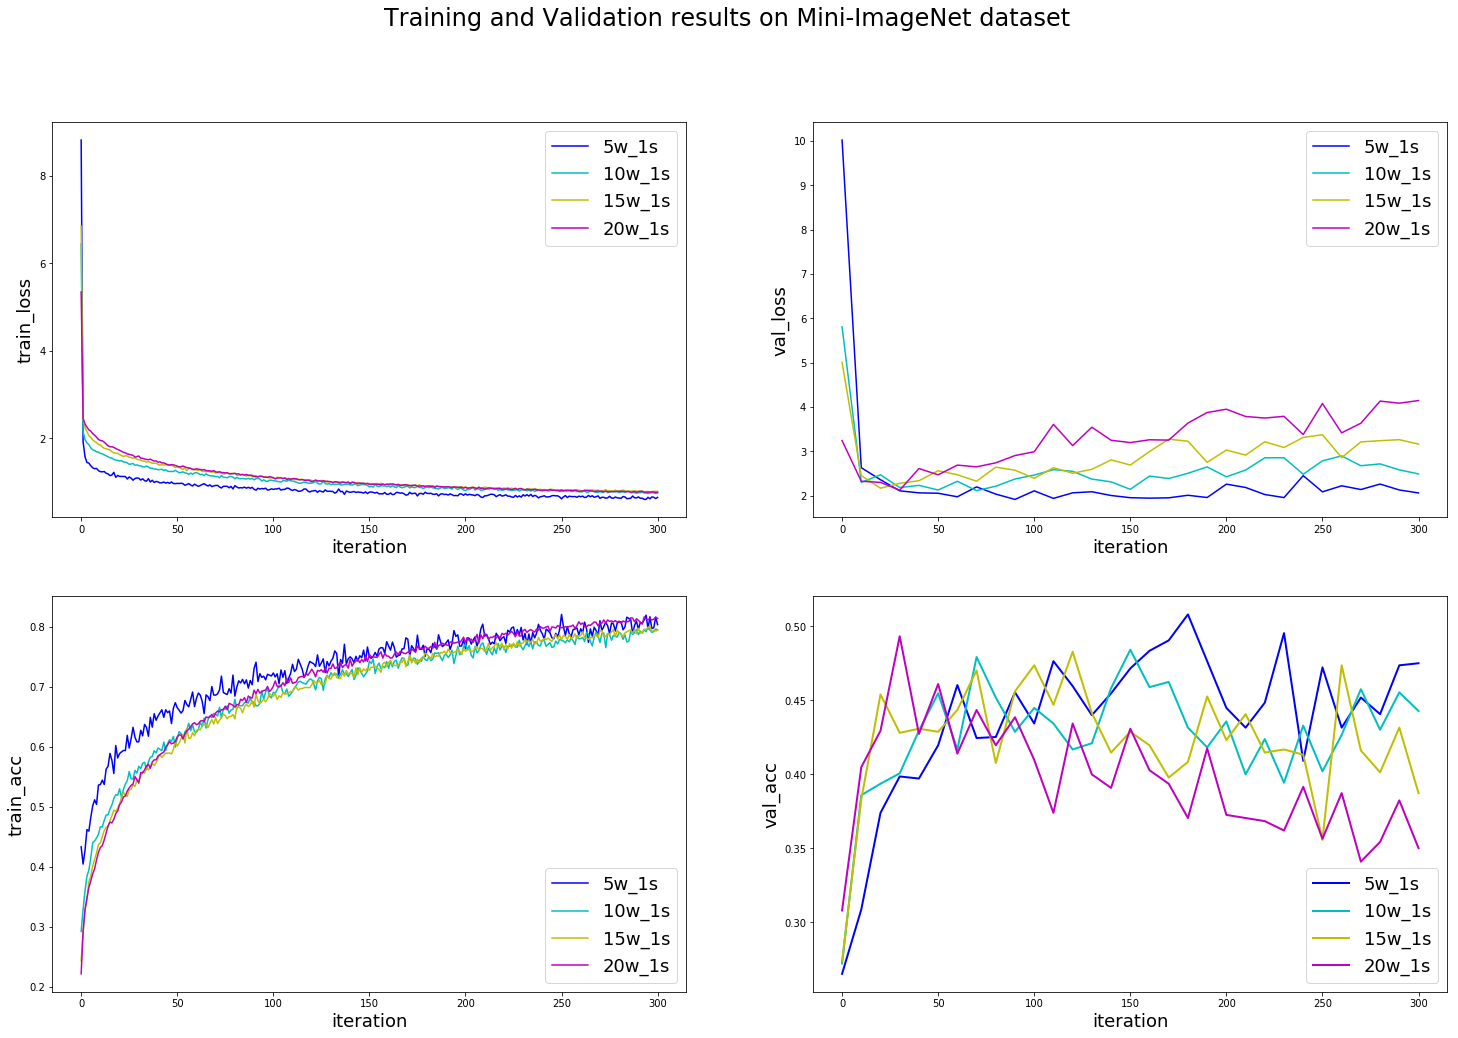

In [12]:
training = np.arange(0, 301, 1)
val = np.arange(0,301, 10)

fig = plt.figure(figsize=(25,16))
fig.suptitle('Training and Validation results on Mini-ImageNet dataset', fontsize=24)

plt.subplot(2, 2, 1)
plt.plot(training, _5w_1s_training_loss[0:301],'b')
plt.plot(training, _10w_1s_training_loss[0:301], 'c')
plt.plot(training, _15w_1s_training_loss[0:301], 'y')
plt.plot(training, _20w_1s_training_loss[0:301], 'm')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_loss', fontsize=18)
plt.gca().legend(('5w_1s','10w_1s','15w_1s','20w_1s'), fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(val, _5w_1s_val_loss[0:31],'b')
plt.plot(val, _10w_1s_val_loss[0:31], 'c')
plt.plot(val, _15w_1s_val_loss[0:31], 'y')
plt.plot(val, _20w_1s_val_loss[0:31], 'm')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5w_1s','10w_1s','15w_1s','20w_1s'), fontsize=18)

plt.subplot(2, 2, 3)
plt.plot(training, _5w_1s_training_acc[0:301],'b')
plt.plot(training, _10w_1s_training_acc[0:301], 'c')
plt.plot(training, _15w_1s_training_acc[0:301], 'y')
plt.plot(training, _20w_1s_training_acc[0:301], 'm')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_acc', fontsize=18)
plt.gca().legend(('5w_1s','10w_1s','15w_1s','20w_1s'), fontsize=18)

plt.subplot(2, 2, 4)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.plot(val, _5w_1s_val_acc[0:31],'b',lw=2)
plt.plot(val, _10w_1s_val_acc[0:31],'c',lw=2)
plt.plot(val, _15w_1s_val_acc[0:31],'y',lw=2)
plt.plot(val, _20w_1s_val_acc[0:31],'m',lw=2)
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_acc', fontsize=18)
plt.gca().legend(('5w_1s','10w_1s','15w_1s','20w_1s'), fontsize=18)
#,prop={'size': 24}
#fig.savefig('shot1.jpg')
plt.show()

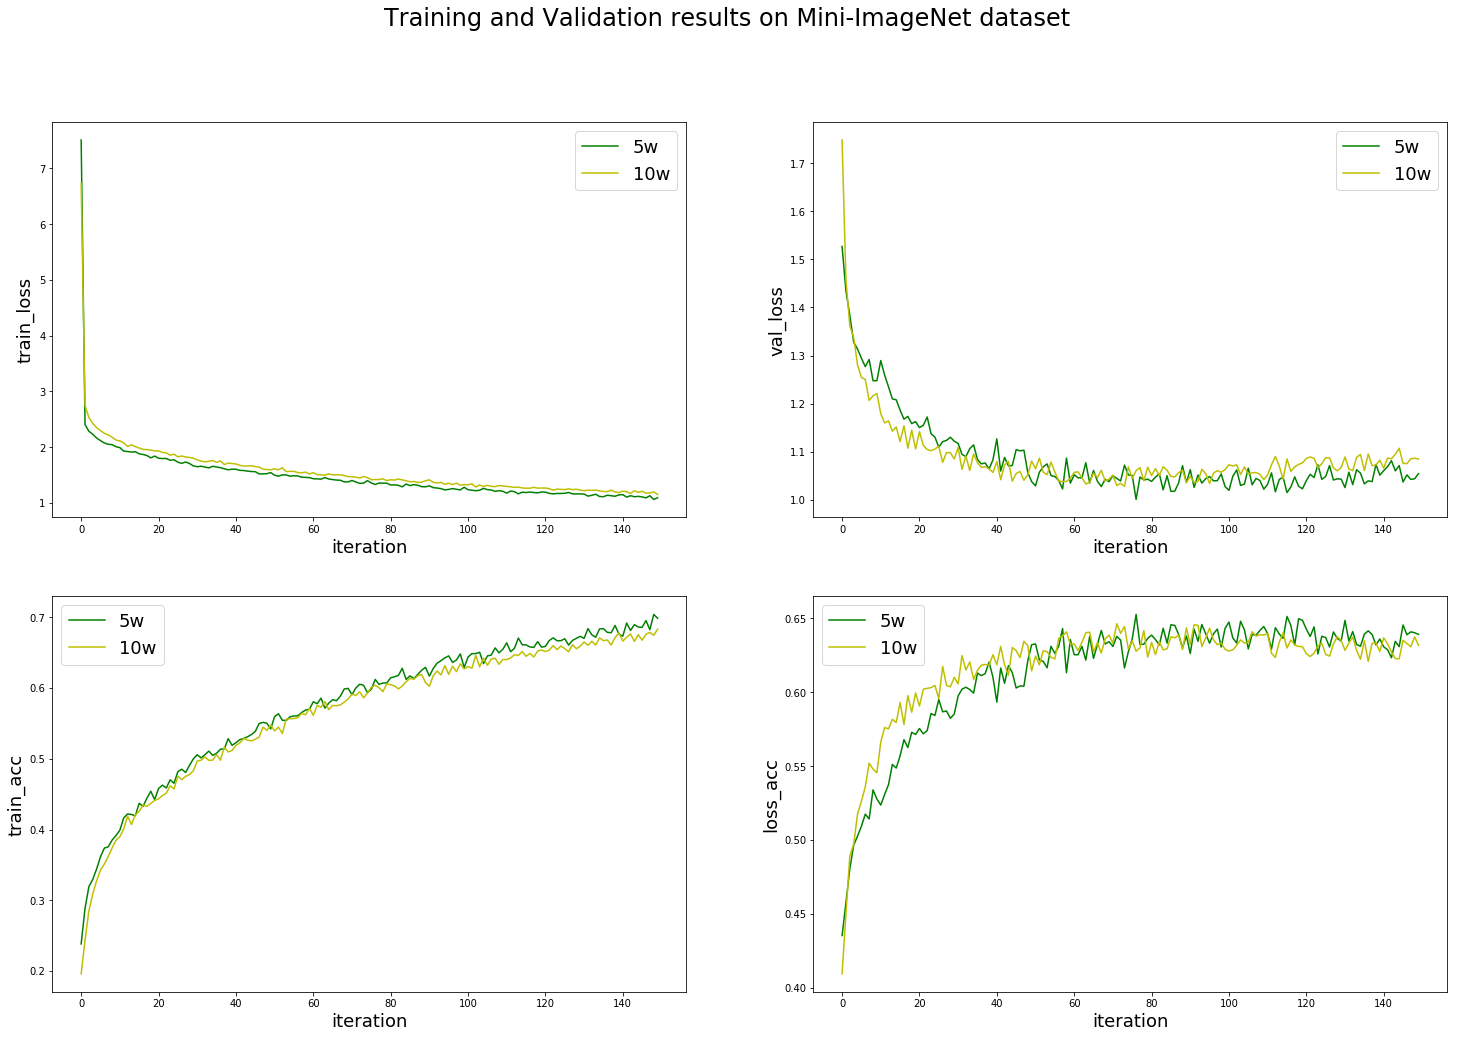

In [10]:
training = np.arange(0, 150, 1)
val = np.arange(0,150, 1)

fig = plt.figure(figsize=(25,16))
fig.suptitle('Training and Validation results on Mini-ImageNet dataset', fontsize=24)

plt.subplot(2, 2, 1)
#plt.plot(training, _5w_5s_training_loss,'b')
#plt.plot(training, _10w_5s_training_loss, 'r')
plt.plot(training, _15w_5s_training_loss,'g')
plt.plot(training, _20w_5s_training_loss, 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 2)
#plt.plot(val, _5w_5s_val_loss,'b')
#plt.plot(val, _10w_5s_val_loss, 'r')
plt.plot(val, _15w_5s_val_loss,'g')
plt.plot(val, _20w_5s_val_loss, 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 3)
#plt.plot(training, _5w_5s_training_acc,'b')
#plt.plot(training, _10w_5s_training_acc, 'r')
plt.plot(training, _15w_5s_training_acc,'g')
plt.plot(training, _20w_5s_training_acc, 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_acc', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

plt.subplot(2, 2, 4)
#plt.plot(val, _5w_5s_val_acc,'b')
#plt.plot(val, _10w_5s_val_acc, 'r')
plt.plot(val, _15w_5s_val_acc,'g')
plt.plot(val, _20w_5s_val_acc, 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('loss_acc', fontsize=18)
plt.gca().legend(('5w','10w','15w','20w'), fontsize=18)

#fig.savefig('shot5.jpg')
plt.show()

In [12]:
#i is length of list being calculated
for i in range(2,50,2):
    mean,diff,index,interval = return_highest(_20w_5s_val_acc,i)
    print('from {} to {}'.format(index,index+interval),mean,diff)

from 91 to 93 0.6454803678848988 0.002123015301579767
from 89 to 93 0.641670844216544 0.010174303778104132
from 68 to 74 0.6397716526872631 0.005238936833494523
from 89 to 97 0.6391645783563156 0.005012440810880037
from 86 to 96 0.6382222226015608 0.0043981836764294124
from 85 to 97 0.6379365081974339 0.0035695158526494186
from 85 to 99 0.6371929828108233 0.003179860690594505
from 82 to 98 0.6362280705733631 0.003096770358925749
from 56 to 74 0.6361069347334917 0.002785889344828041
from 91 to 111 0.635969925345036 0.002492416829638966
from 89 to 111 0.6361418703635046 0.002389430662416814
from 87 to 111 0.6359454196540882 0.002275156599858441
from 85 to 111 0.6360401007506069 0.002092150371818091
from 68 to 96 0.6356211965373456 0.0025255277906695017
from 68 to 98 0.6355009753129436 0.0023585889883004363
from 68 to 100 0.6352318302613863 0.002243906761132508
from 63 to 97 0.635335397928158 0.0022258120600713305
from 62 to 98 0.6352037507132944 0.002105140613289924
from 58 to 96 0.63510